<a href="https://colab.research.google.com/github/SJhawar1010/DL_CV_NLP_Project/blob/main/2348554_CaseStudy_DLCVNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data =  pd.read_csv("/content/drive/MyDrive/DL Datasets/pinterest-fashion-dataset.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_name          1000 non-null   object 
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   object 
 3   location           1000 non-null   object 
 4   category           1000 non-null   object 
 5   brand              1000 non-null   object 
 6   price in $         1000 non-null   float64
 7   click_rate         1000 non-null   int64  
 8   availability       1000 non-null   object 
 9   ratings            1000 non-null   int64  
 10  image_url          1000 non-null   object 
 11  image_description  995 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


user_name: The name or identifier of the user.

age: The age of the user.

gender: The gender of the user.

location: The location of the user.

category: The category of the fashion product.

brand: The brand of the fashion product.

price in $: The price of the fashion product in dollars.

click_rate: The rate of clicks on the fashion product.

availability: The availability status of the fashion product.

ratings: The ratings or score given to the fashion product.

image_url: The URL of the image representing the fashion product.

image_description: The description of the fashion product shown in the image.

In [12]:
data.describe()

,age,price in $,click_rate,ratings
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.020000,59.903500,296.557000,3.023000
std,18.920824,34.059239,115.371623,1.406574
min,20.000000,18.000000,100.000000,1.000000
25%,31.750000,35.237500,198.750000,2.000000
50%,52.000000,50.000000,289.500000,3.000000
75%,66.000000,73.000000,394.000000,4.000000
max,79.000000,200.000000,500.000000,5.000000


In [13]:
data.shape

(1000, 12)

In [14]:
data.head()

,user_name,age,gender,location,category,brand,price in $,click_rate,availability,ratings,image_url,image_description
0,Customer_1,63,Male,Wollongong,Shoes,Converse,66.5,164,Available,5,http://i.pinimg.com/400x/88/70/b0/8870b0d38413...,These are white canvas lace-up sneakers with ...
1,Customer_2,63,Male,Wollongong,Shoes,Adidas,93.1,459,Available,2,http://i.pinimg.com/400x/c3/1d/1e/c31d1e4b326c...,These are women's wedge sandals with a black ...
2,Customer_3,63,Male,Wollongong,Shoes,Fila,66.5,402,Out of Stock,1,http://i.pinimg.com/400x/48/a5/ab/48a5abadc1ce...,A pair of checkerboard slip-on shoes from Van...
3,Customer_4,63,Male,Wollongong,Shoes,Vans,66.5,209,Available,3,http://i.pinimg.com/400x/89/4e/76/894e763a9fe3...,"These are white leather mules with a unique, ..."
4,Customer_5,63,Male,Wollongong,Shoes,Reebok,66.5,455,Available,3,http://i.pinimg.com/400x/61/94/55/619455144ff4...,These white leather slingback shoes are perfe...


In [15]:
data.isnull().sum()

user_name            0
age                  0
gender               0
location             0
category             0
brand                0
price in $           0
click_rate           0
availability         0
ratings              0
image_url            0
image_description    5
dtype: int64

In [17]:
data.dropna(subset=['image_description'], inplace=True)

In [18]:
data.shape

(995, 12)

In [33]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [34]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [36]:
data['processed_description'] = data['image_description'].apply(preprocess_text)

In [37]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['processed_description'])

In [38]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [39]:
image_size = (224, 224)

In [27]:
preprocessed_images = np.array(preprocessed_images)

In [40]:
def preprocess_image(image_url):
    image = Image.open(image_url)
    image = image.resize(image_size)
    image_array = np.array(image) / 255.0
    return image_array

In [43]:
import requests

def download_image(image_url):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()
        image = Image.open(response.raw)
        image = image.resize(image_size)
        image_array = np.array(image) / 255.0
        return image_array
    except Exception as e:
        print(f"Error downloading image from URL: {image_url}, Error: {e}")
        return None
data['processed_image'] = data['image_url'].apply(download_image).dropna()

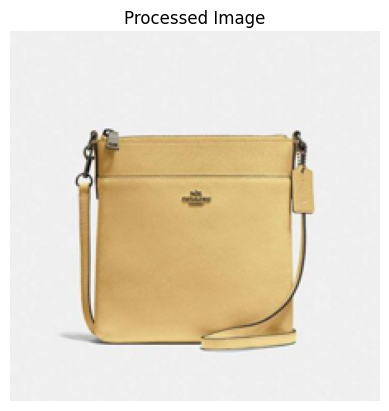

Processed Description:
yellow leather crossbody bag silver zipper black strap made pebbled leather coach logo front bag 10 inches wide 8 inches tall 2 inches deep long strap adjusted fit different heights bag main compartment zippered pocket inside perfect everyday use travel


In [47]:
import random
import matplotlib.pyplot as plt
random_index = random.randint(0, len(data) - 1)
image = data.iloc[random_index]['processed_image']
description = data.iloc[random_index]['processed_description']
plt.imshow(image)
plt.axis('off')
plt.title('Processed Image')
plt.show()
print("Processed Description:")
print(description)

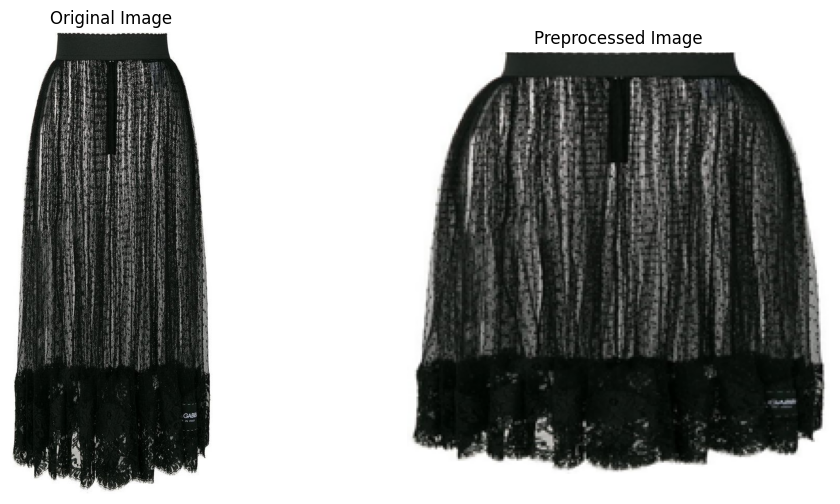

Original Description:
black , pleated , lace maxi skirt elasticated waistband . semi-sheer ruffled hem .

Processed Description:
black pleated lace maxi skirt elasticated waistband ruffled hem


In [49]:
def load_original_image(image_url):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()
        image = Image.open(response.raw)
        return image
    except Exception as e:
        print(f"Error loading original image from URL: {image_url}, Error: {e}")
        return None
random_index = random.randint(0, len(data) - 1)
original_image_url = data.iloc[random_index]['image_url']
original_image = load_original_image(original_image_url)
preprocessed_image = data.iloc[random_index]['processed_image']
description = data.iloc[random_index]['processed_description']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')
axes[1].axis('off')
plt.show()
print("Original Description:")
print(data.iloc[random_index]['image_description'])
print("\nProcessed Description:")
print(description)


In [50]:
from transformers import BertTokenizer, BertModel
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def extract_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze(0)
    return embeddings.numpy()
description_embeddings = data['processed_description'].apply(extract_bert_embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [51]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

In [52]:
resnet_model = models.resnet50(pretrained=True)
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])
resnet_model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 54.2MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [53]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [72]:
import requests
from PIL import Image
import numpy as np

In [73]:
def extract_visual_features(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()
        image = Image.open(BytesIO(response.content)).convert('RGB')
        image = image.resize((224, 224))
        image_array = np.array(image) / 255.0
        return image_array
    except Exception as e:
        print(f"Error downloading or processing image from URL: {image_url}, Error: {e}")
        return None

In [74]:
def extract_visual_features_random(data):
    random_index = np.random.randint(0, len(data))
    image_url = data.iloc[random_index]['image_url']
    visual_features = extract_visual_features(image_url)
    return visual_features

In [75]:
random_visual_features = extract_visual_features_random(data)

In [87]:
print("Shape of textual_features:", textual_features.shape)
print("Shape of visual_features:", visual_features.shape)

Shape of textual_features: torch.Size([1, 768])
Shape of visual_features: torch.Size([1, 2048])


In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, ndcg_score

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last output from RNN
        return out

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(textual_features, visual_features, test_size=0.3, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Train the model
model = RNNModel(input_size=X_train_tensor.shape[2], hidden_size=64, output_size=1)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs_val = model(X_val_tensor)
    val_loss = criterion(outputs_val, y_val_tensor)
    val_preds = torch.sigmoid(outputs_val).numpy().flatten()
    val_labels = y_val_tensor.numpy().flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(val_labels, np.round(val_preds))
precision = precision_score(val_labels, np.round(val_preds))
recall = recall_score(val_labels, np.round(val_preds))
f1 = f1_score(val_labels, np.round(val_preds))
average_precision = average_precision_score(val_labels, val_preds)
ndcg = ndcg_score([val_labels], [val_preds])

# Deployment: Here you can deploy the trained model as a recommendation service integrated into the fashion e-commerce platform.
# For deployment, you can use frameworks like Flask, FastAPI, or deploy to cloud platforms like AWS, GCP, or Azure.

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Average Precision:", average_precision)
print("NDCG Score:", ndcg)


ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.